# Import required packages

In [1]:
from numpy import load
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pycm import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set path to base models val/test predictions (numpy arrays) and load them

In [2]:
model_path = 'C:\\Users\\SWONG\\PRS_project\\Model\\'
arr_path = 'C:\\Users\\SWONG\\PRS_project\\Model\\numpy_baseClassifier_predictions\\'

# load numpy array from npy file
np_val_asym_preds = load(arr_path+'val_preds_asym.npy')
np_val_border_preds = load(arr_path+'val_preds_border.npy')
np_val_center_preds = load(arr_path+'val_preds_center.npy')
np_val_orig_preds = load(arr_path+'val_preds_orig.npy')
np_val_blueWhite_preds = load(arr_path+'val_preds_blueWhite.npy')

np_test_asym_preds = load(arr_path+'test_preds_asym.npy')
np_test_border_preds = load(arr_path+'test_preds_border.npy')
np_test_center_preds = load(arr_path+'test_preds_center.npy')
np_test_orig_preds = load(arr_path+'test_preds_orig.npy')
np_test_blueWhite_preds = load(arr_path+'test_preds_blueWhite.npy')

In [3]:
#storing the true labels in lists
train_labelled_class = [0]*902 + [1]*7209
val_labelled_class = [0]*100 + [1]*802
test_labelled_class = [0]*111 + [1]*891

# Define the X (input) and the Y (true labels) for val and test data

In [4]:
X_val = np.concatenate(np.array([np_val_asym_preds, np_val_border_preds, np_val_center_preds, np_val_orig_preds, np_val_blueWhite_preds]), axis=1)
Y_val = np.array(val_labelled_class)
X_test = np.concatenate(np.array([np_test_asym_preds, np_test_border_preds, np_test_center_preds, np_test_orig_preds, np_test_blueWhite_preds]), axis=1)
Y_test = np.array(test_labelled_class)

# Train LOGISTIC REGRESSION classifier using base models val predictions

In [5]:
#combine model validation data predictions by SVM
#fit the logistic regression model using X_val and Y_val data
lr_model = LogisticRegression(class_weight='balanced').fit(X_val, Y_val)

#perform prediction on test data
lr_pred_class = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)

# Logistic Regression Accuracy, Classification Report, Confusion Matrix

In [10]:
#Logistic regression classifier, trained on base model valiadation data predictions
        
print("Accuracy:",accuracy_score(Y_test,lr_pred_class)*100)
print("Report:", classification_report(Y_test,lr_pred_class))

Accuracy: 89.22155688622755
Report:               precision    recall  f1-score   support

           0       0.51      0.82      0.63       111
           1       0.98      0.90      0.94       891

    accuracy                           0.89      1002
   macro avg       0.74      0.86      0.78      1002
weighted avg       0.92      0.89      0.90      1002



In [11]:
print(ConfusionMatrix(actual_vector=list(Y_test),predict_vector=(lr_pred_class)))

Predict   0         1         
Actual
0         91        20        

1         88        803       





Overall Statistics : 

95% CI                                                            (0.87301,0.91142)
ACC Macro                                                         0.89222
ARI                                                               0.48673
AUNP                                                              0.86053
AUNU                                                              0.86053
Bangdiwala B                                                      0.86713
Bennett S                                                         0.78443
CBA                                                               0.70481
CSI                                                               0.60257
Chi-Squared                                                       349.74506
Chi-Squared DF                                                    1
Conditional Entropy                                

In [12]:
#LogReg classifier, trained on base model valiadation data predictions

#class predictions for each image based on probabilities
Y_pred = []
threshold = 0.5

for pred in lr_pred_proba[:,1]:
    if (pred <= threshold):
        Y_pred.append(0)
    elif (pred > threshold):
        Y_pred.append(1)

print("Accuracy:",accuracy_score(Y_test, Y_pred)*100)
print("Report:", classification_report(Y_test, Y_pred))

Accuracy: 89.22155688622755
Report:               precision    recall  f1-score   support

           0       0.51      0.82      0.63       111
           1       0.98      0.90      0.94       891

    accuracy                           0.89      1002
   macro avg       0.74      0.86      0.78      1002
weighted avg       0.92      0.89      0.90      1002



# AUC Score

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
    
#getting AUC score
roc_auc_lr = roc_auc_score(Y_test, lr_pred_class)
roc_auc_lr_proba = roc_auc_score(Y_test, lr_pred_proba[:,1])

print("AUC Score (logistic regression): ", roc_auc_lr)
print("AUC Score (SVM (proba)): ", roc_auc_lr_proba)

AUC Score (logistic regression):  0.8605271938605272
AUC Score (SVM (proba)):  0.9420834976390532


# Plot ROC curve and save

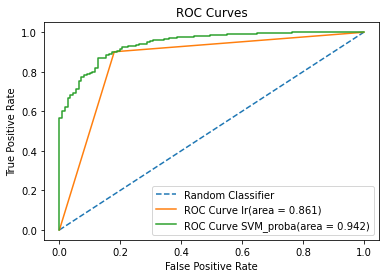

Path to plot: C:\Users\SWONG\PRS_project\Model\LogReg_Arbitrator_roc.png


In [15]:
#plotting ROC
fpr1, tpr1, thresholds1 = roc_curve(Y_test, lr_pred_class)
fpr2, tpr2, thresholds2 = roc_curve(Y_test, lr_pred_proba[:,1])

plt.figure()
plt.plot([0,1],[0,1],'--', label='Random Classifier')
plt.plot(fpr1,tpr1,label='ROC Curve lr(area = %0.3f)' %roc_auc_lr)
plt.plot(fpr2,tpr2,label='ROC Curve SVM_proba(area = %0.3f)' %roc_auc_lr_proba)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves")
plt.legend(loc="lower right")

roc_plotpath  = model_path + 'LogReg_Arbitrator' + '_roc.png'
plt.savefig(roc_plotpath)
plt.show()
print("Path to plot:", roc_plotpath)

# Save model to disk

In [10]:
import pickle

# save the model to disk
filename = 'LogReg_Arbitrator.sav'
pickle.dump(lr_model, open(filename, 'wb'))